In [1]:
#使用OPENCV读取图片
import numpy as np
import cv2
import matplotlib.pyplot as plt
#matplotlib inline

img = cv2.imread('link.jpg')
print(img.shape)
#使用matplotlib展示图片
plt.imshow(img)
#图片为什么会这样，因为OPENCV默认的是BGR编码，而系统默认的是RGB

(750, 500, 3)


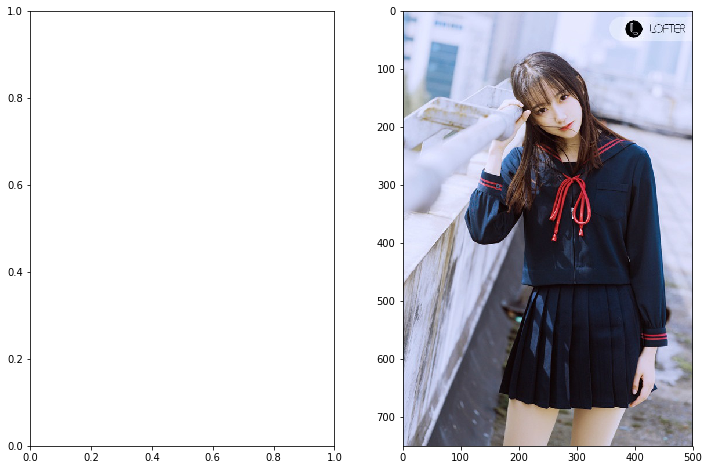

In [2]:
import numpy as np
import cv2
#将BGR转化为RGB，方法一数组操作
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
#ax1.imshow(img[:,:,np.array([2,1,0])])
ax2.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [3]:
#利用OPENCV改变图片尺寸
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_gray_small = cv2.resize(img_gray,(750,500))
cv2.imwrite("gray_out.jpg",img_gray_small)

True

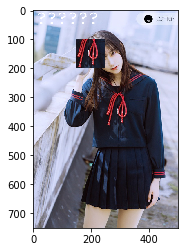

In [4]:
imageSegment = img[300:400,250:350]
img[100:200,150:250] = imageSegment
cv2.putText(img,"文字",(10,50),cv2.FONT_HERSHEY_PLAIN,
           4,(255,255,255),2,cv2.LINE_AA)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

(220, 220)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


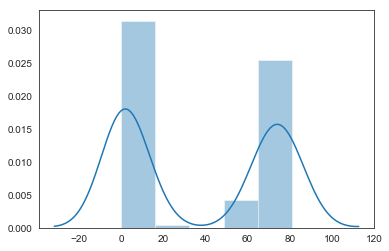

In [5]:
import cv2
import seaborn as sns
img_jizhiQR = cv2.imread("3.png")
img_jizhiQR = cv2.cvtColor(img_jizhiQR,cv2.COLOR_BGR2GRAY)
print(img_jizhiQR.shape)

#将120*120的图像映射成25*25
#规定220个坐标点，分别对应到25个坐标点上
np_220to25_idx = np.linspace(0,24.9,220).astype(np.int)

#对两个维度一起规定，如此220*220二维平面上的每个点就都有了25*25的映射
np_220to25_mesh = np.meshgrid(np_220to25_idx,np_220to25_idx)
np_25_counts = np.zeros([25,25])
for row_idx in range(220) :
    for col_idx in range(220) :
        col_num_25 = np_220to25_mesh[0][row_idx][col_idx]
        row_num_25 = np_220to25_mesh[1][row_idx][col_idx]
        if img_jizhiQR[row_idx][col_idx] ==255:
            #如果原先是白色，则这里25*25矩阵中对应点+1
            np_25_counts[row_num_25][col_num_25] += 1;
#统计25*25矩阵中每个点有多少在映射前是白色
sns.set_style('white')
sns.distplot(np_25_counts.ravel())

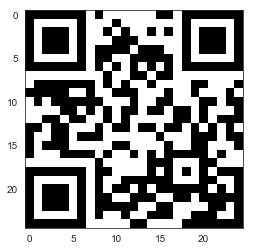

In [6]:
plt.imshow(np_25_counts>40,cmap="gray")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


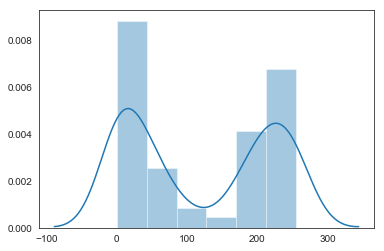

In [7]:
#使用神经网络
import tensorflow as tf

#这里类似解方程设置未知数
mat_input = tf.placeholder(tf.float32)

#我们使用一个大小9*9的互不重叠（步长为9）的卷积核，扫描输入
op = tf.nn.avg_pool(value=mat_input,ksize=[1,9,9,1],strides=[1,9,9,1],padding='SAME')
#计算结果
with tf.Session() as sess:
    #初始化
    sess.run(tf.global_variables_initializer())
    #将数据转换为[N(number,图片数目),H(height,图片高度)，W（width，图片宽度），C（channel，图片通道数）]的格式得到结果
    #因此需要将二维的图片，在数目，颜色通道两个维度都加上
    res = (sess.run(op,feed_dict={mat_input:img_jizhiQR[np.newaxis,:,:,np.newaxis]}))
sns.distplot(res.ravel())

122.77778
(1, 25, 25, 1)


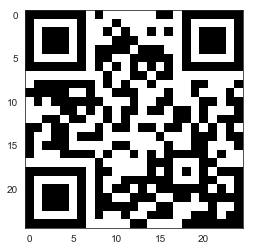

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,random_state=0).fit(res.ravel().reshape(-1,1))
min(res.ravel()[kmeans.labels_==1])
minVal = min(res.ravel()[kmeans.labels_==1])
print(minVal)
print(res.shape)
plt.imshow(res[0,:,:,0] > 122.78, cmap="gray")

In [9]:
import tensorflow as tf
#整理成函数，利用TF二值化图片
def AvgPool(img_input,num_out):
    mat_input = tf.placeholder(tf.float32)
    k_size = int(img_input.shape[0]/num_out)+1
    op = tf.nn.avg_pool(value=mat_input,ksize=[1,9,9,1],strides=[1,9,9,1],padding='SAME')
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        res = (sess.run(op,feed_dict={mat_input:img_input[np.newaxis,:,:,np.newaxis]}))
    bigger_label=1
    kmeans = KMeans(n_clusters=2,random_state=0).fit(res.ravel().reshape(-1,1))
    if kmeans.cluster_centers_[0] >kmeans.cluster_centers_[1]:
        bigger_label = 0;
    threshold = min(res.ravel()[kmeans.labels_==bigger_label])
    return res[0,:,:,0] > threshold

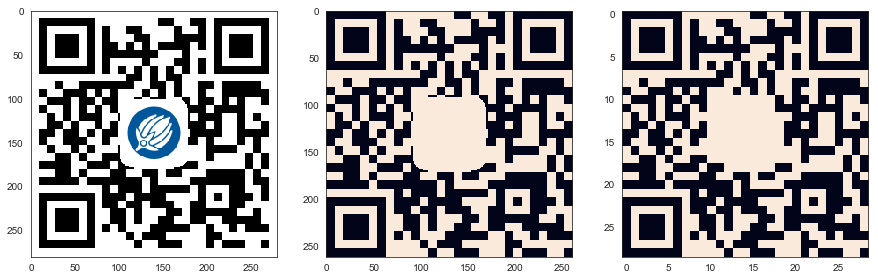

In [10]:
#读取图片
img_jizhiQR = cv2.imread("jizhi_qinding.png")
img_jizhiQR = img_jizhiQR[:,:,::-1]

#去掉白色边缘
img_jizhiQR_gray = cv2.cvtColor(img_jizhiQR,cv2.COLOR_RGB2GRAY)
np_totalRow = np.arange(img_jizhiQR.shape[0])#记下一共多少行

idx_rowUsed = np_totalRow[img_jizhiQR_gray.mean(0) != 255]#记录每行每列的平均值不是255的TURE
idx_colUsed = np_totalRow[img_jizhiQR_gray.mean(1) != 255]
img_jizhiQR_rmBlank = img_jizhiQR[idx_rowUsed,:,:][:,idx_colUsed,:]#去掉每行每列平均值是255的行和列

#去掉中间蓝色部分，即新建一个空白矩阵，然后将原先矩阵是黑色的部分在新阵中设为255
img_jizhiQR_new = np.zeros([img_jizhiQR_rmBlank.shape[0],img_jizhiQR_rmBlank.shape[1]]) + 255
idx_black = (img_jizhiQR_rmBlank[:,:,0]<10)*(img_jizhiQR_rmBlank[:,:,1]<10)*(img_jizhiQR_rmBlank[:,:,2]<10)

img_jizhiQR_new[idx_black] =0

#用TF池化函数，将二维码大小减小到29*29
np_25_counts_tf = AvgPool(img_jizhiQR_new,29)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131) 
ax2 = fig.add_subplot(132) 
ax3 = fig.add_subplot(133)

ax1.imshow(img_jizhiQR)
ax2.imshow(img_jizhiQR_new)
ax3.imshow(np_25_counts_tf)

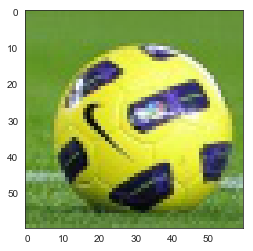

In [11]:
#使用OPENCV“抠图”——基于颜色通道以及形态特征
img = cv2.imread('messi5.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
ball = img[280:340,330:390]#从原图中截取足球
plt.imshow(ball)
#img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#plt.imshow(img_gray,cmap="gray")

#利用OPENCV抠图，首先观察数据。这个球具有以下特点：1.看起来是圆形。2.颜色是黄色+苍蓝色。3.背景是绿色。
#所以可以确定以下思路：1.识别圆形的算法——HOUGH算法。2.用黄色+藏蓝色将球从背景提取出来。3.用绿色过滤背景。

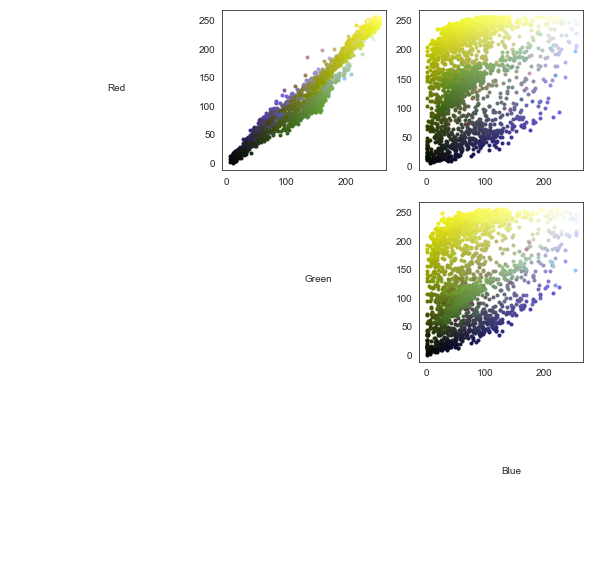

In [12]:
#利用OPENCV抠图，首先观察数据。这个球具有以下特点：1.看起来是圆形。2.颜色是黄色+苍蓝色。3.背景是绿色。
#所以可以确定以下思路：1.识别圆形的算法——HOUGH算法。2.用黄色+藏蓝色将球从背景提取出来。3.用绿色过滤背景。
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(332)
#print(ball.reshape(-1,3).shape)#我们不知道z的shape属性是多少，
                               #但是想让z变成只有3列，行数不知道多少，
                               #通过`z.reshape(-1,3)`，Numpy自动计算出有3600行，
                               #新的数组shape属性为(3600, 3)，与原来的(60, 60，3)配套。
for r in ball.reshape(-1,3):
    ax.plot(r[1],r[0],'.',c=(r[0]/255.,r[1]/255.,r[2]/255.))

ax = fig.add_subplot(333)
for r in ball.reshape(-1,3):
    ax.plot(r[2],r[1],'.',c=(r[0]/255.,r[1]/255.,r[2]/255.))
    
ax = fig.add_subplot(336)
for r in ball.reshape(-1,3):
    ax.plot(r[2],r[0],'.',c=(r[0]/255.,r[1]/255.,r[2]/255.))
    
for i,color in enumerate(["Red","Green","Blue"]):
    ax = fig.add_subplot(3,3,i*3+i+1)
    ax.text(5,5,color)
    ax.plot(0,0)
    ax.plot(10,10)
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)
    ax.axis('off')
    
#图为ball各像素点RGB的分布情况，图中的黄色与蓝黑色均为足球的颜色，而绿色式足球场的颜色，接下来需要寻找一个规则来区分足球与足球场

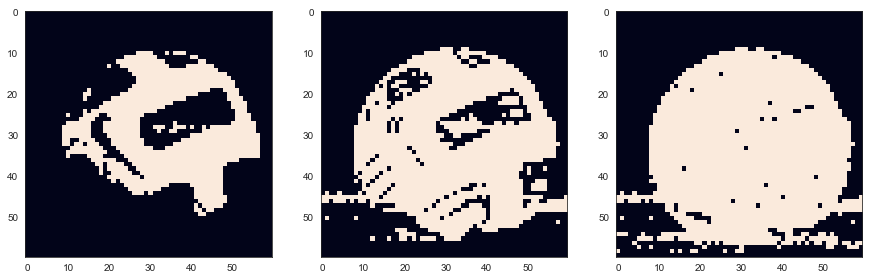

In [24]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.imshow((ball[:,:,0]>200))
ax2.imshow((ball[:,:,0]>130)+(ball[:,:,0]<50))
ax3.imshow((ball[:,:,0]>130)+(ball[:,:,0]<50)+(ball[0:,:,1]<120))

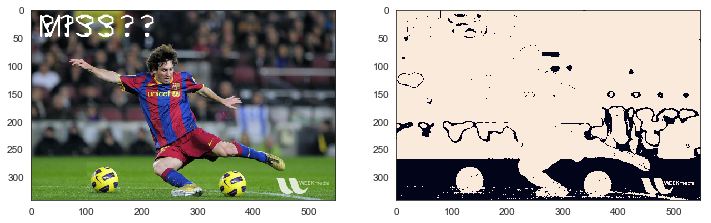

In [37]:
img[273:333,100:160] = ball
cv2.putText(img,"MISS",(10,50),cv2.FONT_HERSHEY_PLAIN,4,(255,255,255),2,cv2.LINE_AA)
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

img1 = ((img[:,:,0]>130)+(img[:,:,0]<50)+(img[:,:,1]<120)).astype(np.uint8)
ax1.imshow(img)
ax2.imshow(img1)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


Text(0.5, 1.0, '第三次侵蚀3像素')

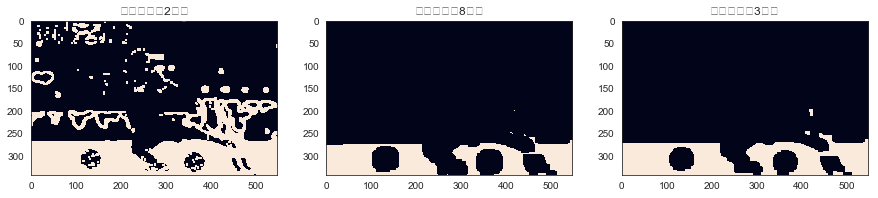

In [40]:
#现在利用OPENCV进行一组侵蚀和稀释操作
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))#定义结构元素
print(kernel)

img_e = cv2.erode(img1,kernel,iterations=2)
img_de = cv2.dilate(img_e,kernel,iterations=8)
img_ede = cv2.erode(img_de,kernel,iterations=3)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.imshow(img_e+255)
ax2.imshow(img_de+255)
ax3.imshow(img_ede+255)
ax1.set_title(u"第一次侵蚀2像素")
ax2.set_title(u"第二次稀释8像素")
ax3.set_title(u"第三次侵蚀3像素")

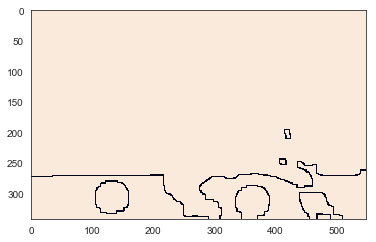

In [43]:
#利用SOBEL算子进行边缘检测
sobelx = cv2.Sobel(img_ede,cv2.CV_64F,1,0)
sobely = cv2.Sobel(img_ede,cv2.CV_64F,0,1)
img_sob = np.sqrt(sobelx**2+sobely**2).astype(np.uint8)
plt.imshow(img_sob+255)

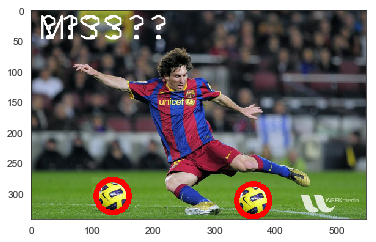

In [60]:
#现在得到了圆形的边缘，接下来进行圆形检测
gray = img_sob+255
#首先用CANNY算子过滤边缘
canny = cv2.Canny(gray,200,300)

#其次用中位数进行卷积操作，平滑颜色梯度（中值滤波）
gray = cv2.medianBlur(gray,5)
#plt.imshow(gray,"gray")
#最后用HOUGHCIRCLES函数检测圆形物体
np_hc = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,dp=1,minDist=60,param1=200,param2=10,minRadius=20,maxRadius=30)

#展示结果
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(img_sob,"gray")
img_tmp = np_hc

for i in range(np_hc.shape[1]):
    img_tmp = cv2.circle(img,(np_hc[0,i,0],np_hc[0,i,1]),np_hc[0,i,2],(255,0,0),8)
plt.imshow(img_tmp)

In [30]:
#https://s3.amazonaws.com/udacity-sdc/Vehicle_Tracking/vehicles.zip
#https://s3.amazonaws.com/udacity-sdc/Vehicle_Tracking/non-vehicles.zip

#观察数据
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
import cv2
import scipy.stats as stats
from tqdm import tqdm
import os
from sklearn.metrics import confusion_matrix, auc, roc_auc_score
import matplotlib.pyplot as plt
import sklearn
from skimage.feature import hog
import pandas as pd
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC,SVC
from sklearn.preprocessing import StandardScaler
import time
from scipy.ndimage.measurements import label
import numpy as np
import functools
import pickle


#l_samp = !dir C:\Users\Administrator\deeplearning\dataset\*vehicles
l_samp = !ls ./dataset/*vehicles/
#print(l_samp)

M_ClassDict = {"non-vehicles" : 0, "vehicles" : 1}
pd_SampClass = pd.DataFrame({
    "Sample" : l_samp, 
    "Class"   : list(map(lambda x: M_ClassDict[x], list(map(lambda x: x.split("/")[2], l_samp))))
})[['Sample', 'Class']]
pd_SampClass_train,pd_SampClass_cv = train_test_split(pd_SampClass, test_size=0.33, random_state=42)
pd_SampClass_train.head()

IndexError: list index out of range

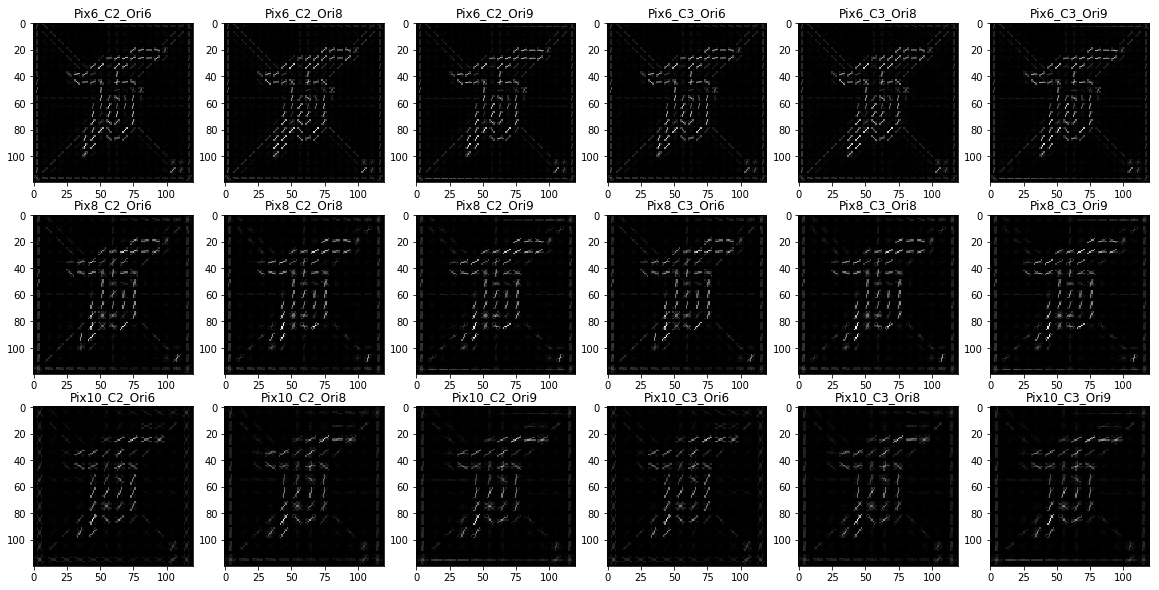

In [40]:
import cv2
img = cv2.imread('p11.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
fig = plt.figure(figsize=(20,10))
#pix_per_cell是指多少个像素作为一个网格来计算，这个值越高，切出来的网格数就越少，整个HOG的结果就越粗略
#cell_per_block是指一个网格内使用几个方向指针，如果是十字交叉的情况，则至少需要两个方向指针进行交叉，才可以表示出十字
#orient是指切出来的网格有几种方向走势，如果是4则是上下左右，如果是8就再增加上左，上右，下左，下右
for i1,pix_per_cell in enumerate([6,8,10]):
    for i2,cell_per_block in enumerate([2,3]):
        for i3,orient in enumerate([6,8,9]):
            features, hog_image = hog(img_gray, pixels_per_cell=(pix_per_cell,pix_per_cell), 
                               cells_per_block=(cell_per_block,cell_per_block),
                               orientations=orient, visualise=True, feature_vector=False
                         )
            #print(features.shape)
            ax = fig.add_subplot(3,6,i1*6+i2*3+i3+1)
            ax.imshow(hog_image, 'gray')
            ax.set_title("Pix%d_C%d_Ori%d" % (pix_per_cell, cell_per_block, orient))

0 6
1 8
2 10
